In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
#Loading Dataset:
!pip install -q kaggle


In [4]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/temp/V2.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V2.zip
   creating: dataset/V2/
   creating: dataset/V2/Annotations/
  inflating: dataset/V2/Annotations/scene00022.png  
  inflating: dataset/V2/Annotations/scene00023.png  
  inflating: dataset/V2/Annotations/scene00024.png  
  inflating: dataset/V2/Annotations/scene00025.png  
  inflating: dataset/V2/Annotations/scene00026.png  
  inflating: dataset/V2/Annotations/scene00027.png  
  inflating: dataset/V2/Annotations/scene00028.png  
  inflating: dataset/V2/Annotations/scene00029.png  
  inflating: dataset/V2/Annotations/scene00030.png  
  inflating: dataset/V2/Annotations/scene00031.png  
  inflating: dataset/V2/Annotations/scene00032.png  
  inflating: dataset/V2/Annotations/scene00033.png  
  inflating: dataset/V2/Annotations/scene00034.png  
  inflating: dataset/V2/Annotations/scene00035.png  
  inflating: dataset/V2/Annotations/scene00036.png  
  inflating: dataset/V2/Annotations/scene00037.png  
  inflating: dataset/V2/Annotations/scene0003

Make proper accurate splits of data

In [6]:
#convert all the segmented images into black and white
import cv2
import os
import numpy as np

def convert_annotations(input_folder, output_folder):
    """
    Convert pink annotations to binary (black and white) masks
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Convert to binary mask
            # Convert to grayscale first
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold to create binary image
            # Assuming pink regions are significantly different from black background
            _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Save the binary mask
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary)

# Usage
input_folder = "/content/dataset/V2/Annotations"
output_folder = "/content/dataset/V2/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [7]:
mkdir '/content/dataset/test/masks'

mkdir: cannot create directory ‘/content/dataset/test/masks’: No such file or directory


In [8]:
mkdir '/content/dataset/test/Images'

mkdir: cannot create directory ‘/content/dataset/test/Images’: No such file or directory


In [9]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/V2/Images/'
MASK_PATH = '/content/dataset/V2/AnnotationsWB'
TEST_PATH = '/content/dataset/test/Images'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.jpeg')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.1)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 12 images to the test directory: /content/dataset/test/Images
Number of files in the test directory: 12


In [10]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test/masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    mask_filename = os.path.splitext(image_filename)[0] + ".png"
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: scene00090.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00090.png
Checking for mask: scene00029.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00029.png
Checking for mask: scene00125.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00125.png
Checking for mask: scene00145.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00145.png
Checking for mask: scene00086.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00086.png
Checking for mask: scene00024.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00024.png
Checking for mask: scene00095.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00095.png
Checking for mask: scene00035.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00035.png
Checking for mask: scene00120.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00120.png
Checking for mask: scene00080.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene

In [11]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 116
Number of files in the train_image directory: 116


In [12]:
print("Number of files in the mask directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the mask directory: 12
Number of files in the train_image directory: 12


In [13]:
import os
from PIL import Image

def convert_png_to_jpeg(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            try:
                img = Image.open(os.path.join(directory, filename))
                # Convert image to RGB mode if it's not already
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                new_filename = os.path.splitext(filename)[0] + ".jpeg"
                img.save(os.path.join(directory, new_filename), "JPEG")
                os.remove(os.path.join(directory, filename))  # Remove the original PNG file
                print(f"Converted {filename} to {new_filename}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")


convert_png_to_jpeg("/content/dataset/test/masks")

Converted scene00080.png to scene00080.jpeg
Converted scene00066.png to scene00066.jpeg
Converted scene00125.png to scene00125.jpeg
Converted scene00086.png to scene00086.jpeg
Converted scene00145.png to scene00145.jpeg
Converted scene00029.png to scene00029.jpeg
Converted scene00120.png to scene00120.jpeg
Converted scene00024.png to scene00024.jpeg
Converted scene00035.png to scene00035.jpeg
Converted scene00090.png to scene00090.jpeg
Converted scene00047.png to scene00047.jpeg
Converted scene00095.png to scene00095.jpeg


In [14]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V2/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V2/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/V2/Images/scene00113.jpeg -> /content/dataset/V2/Imagespng/scene00113.png
Converted: /content/dataset/V2/Images/scene00056.jpeg -> /content/dataset/V2/Imagespng/scene00056.png
Converted: /content/dataset/V2/Images/scene00094.jpeg -> /content/dataset/V2/Imagespng/scene00094.png
Converted: /content/dataset/V2/Images/scene00072.jpeg -> /content/dataset/V2/Imagespng/scene00072.png
Converted: /content/dataset/V2/Images/scene00149.jpeg -> /content/dataset/V2/Imagespng/scene00149.png
Converted: /content/dataset/V2/Images/scene00107.jpeg -> /content/dataset/V2/Imagespng/scene00107.png
Converted: /content/dataset/V2/Images/scene00076.jpeg -> /content/dataset/V2/Imagespng/scene00076.png
Converted: /content/dataset/V2/Images/scene00140.jpeg -> /content/dataset/V2/Imagespng/scene00140.png
Converted: /content/dataset/V2/Images/scene00121.jpeg -> /content/dataset/V2/Imagespng/scene00121.png
Converted: /content/dataset/V2/Images/scene00142.jpeg -> /content/dataset/V2/Image

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (128,128))#change size of input image here...

    img = img / 255.0

    return img

INterRouted Method:

In [16]:
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(128,128)):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        images = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))
        masks = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            # Load and preprocess image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0
            img = np.expand_dims(img, axis=-1)

            # Load and preprocess mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)

            images[i] = img
            masks[i] = mask

        return images, masks

**Light Weight UNet Model**

In [17]:
!pip install keras_unet_collection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.1 MB/s eta 0:00:00


In [18]:
from keras_unet_collection import models

In [19]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6
    # Explicitly cast to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat)
    return (2. * intersection + smooth) / (union + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coefficient(y_true, y_pred)

#comibned loss uses both binary crossentropy and dice loss
def combined_loss(y_true, y_pred):
    # Ensure consistent types
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce + dice

In [20]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(128,128)):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        batch_size = len(batch_files)
        images = np.zeros((batch_size, self.image_size[0], self.image_size[1], 1))
        masks = np.zeros((batch_size, self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            # Load image
            img = cv2.imread(os.path.join(self.image_folder, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, self.image_size)
            img = img.astype('float32') / 255.0
            images[i, :, :, 0] = img

            # Load mask
            mask = cv2.imread(os.path.join(self.mask_folder, filename), cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, self.image_size)
            mask = mask.astype('float32') / 255.0
            masks[i, :, :, 0] = mask

        return images, masks

In [21]:
from keras_unet_collection import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# Define paths
IMAGE_PATH = "/content/dataset/V2/Imagespng"
MASK_PATH = "/content/dataset/V2/Annotations"

# Modified model definition for single-channel input
def build_lightweight_unet():
    model = models.unet_2d(
        input_size=(128, 128, 1),
        filter_num=[2,4,8,16,32],
        n_labels=1,
        stack_num_down=2,
        stack_num_up=1,
        activation='ReLU',
        output_activation='Sigmoid',
        batch_norm=True,
        pool='max',
        unpool='nearest',
        name='lightweight_unet'
    )
    return model

model = build_lightweight_unet()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=combined_loss,
    metrics=['accuracy']
)

In [22]:
# Print the model summary to confirm the architecture
model.summary()
batch_size=4

Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │             18 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,025 (121.19 KB)

 Non-trainable params: 368 (1.44 KB)

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

IMAGE_PATH="/content/dataset/V2/Imagespng"
MASK_PATH="/content/dataset/V2/AnnotationsWB"

# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

# Training setup remains the same, just use the new DataGenerator
train_data_gen = DataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = DataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

In [24]:
# Extract a single batch from the train_data_gen
sample_images, sample_masks = train_data_gen[0]  # First batch

# Get the shape of a single image and mask from the batch
image_shape = sample_images[0].shape  # Shape of one image in the batch
mask_shape = sample_masks[0].shape   # Shape of one mask in the batch

print(f"Image shape: {image_shape}")
print(f"Mask shape: {mask_shape}")

Image shape: (128, 128, 1)
Mask shape: (128, 128, 1)


Binary Focal Loss ( LLM suggested solution for the varying non signmoid segmentation result )

In [25]:
# # Modified loss function
# def binary_focal_loss(gamma=2.0, alpha=0.25):
#     def focal_loss(y_true, y_pred):
#         y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
#         loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred) - \
#                (1 - y_true) * (1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
#         return tf.reduce_mean(loss)
#     return focal_loss

# # Modified model compilation
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Increased learning rate
#     loss=binary_focal_loss(),
#     metrics=['accuracy', tf.keras.metrics.BinaryIoU(threshold=0.5)]
# )

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=70,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

model.save("LightWeightUNetLiver.h5")

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.2744 - loss: 1.4541 - val_accuracy: 0.3645 - val_loss: 1.3538 - learning_rate: 1.0000e-04
Epoch 2/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.2903 - loss: 1.3976 - val_accuracy: 0.6404 - val_loss: 1.3538 - learning_rate: 1.0000e-04
Epoch 3/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3069 - loss: 1.3568 - val_accuracy: 0.6652 - val_loss: 1.3543 - learning_rate: 1.0000e-04
Epoch 4/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3332 - loss: 1.3133 - val_accuracy: 0.6970 - val_loss: 1.3534 - learning_rate: 1.0000e-04
Epoch 5/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3775 - loss: 1.2730 - val_accuracy: 0.7200 - val_loss: 1.3526 - learning_rate: 1.0000e-04
Epoch 6/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5909 - loss: 1.2388 - val_accuracy: 0.7234 - val_loss: 1.3521 - learning_rate: 1.0000e-04
Epoch 7/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6689 - loss: 1

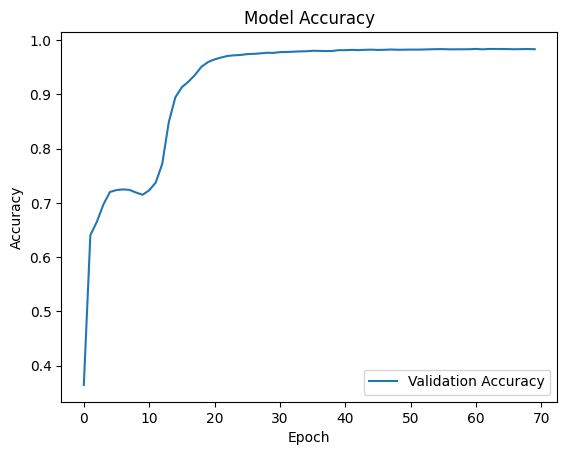

In [27]:
# Train the model for
# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


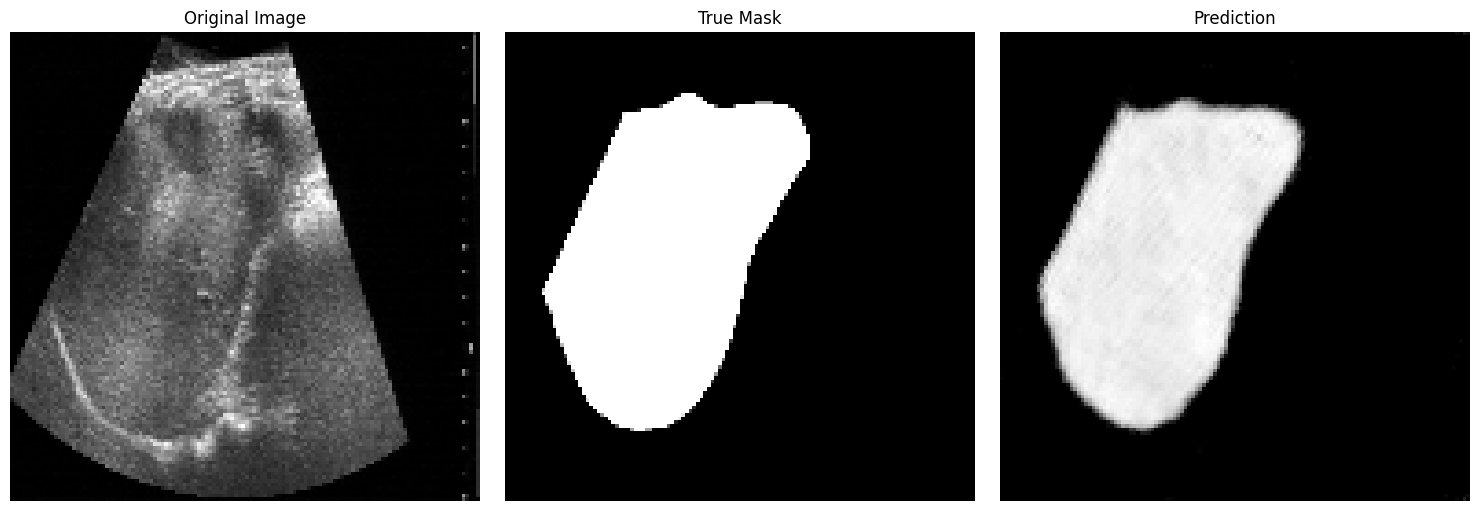

In [28]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def visualize_results(image_path, mask_path, model, image_size=(128, 128)):
    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, image_size)
    image_normalized = image.astype('float32') / 255.0

    # Load and preprocess mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, image_size)
    mask_normalized = mask.astype('float32') / 255.0

    # Make prediction
    input_image = np.expand_dims(image_normalized, axis=[0, -1])
    prediction = model.predict(input_image)
    prediction = prediction[0, :, :, 0]

    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot true mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('True Mask')
    axes[1].axis('off')

    # Plot prediction
    axes[2].imshow(prediction, cmap='gray')
    axes[2].set_title('Prediction')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Usage example:
sample_image_path = "/content/dataset/V2/Imagespng/scene00022.png"
sample_mask_path = "/content/dataset/V2/AnnotationsWB/scene00022.png"
visualize_results(sample_image_path, sample_mask_path, model)

Why multi Color Segmentation, shouldn't it be sigmoid?

Original image shape: (480, 712)
Original image range: [0, 147]
Input shape to model: (1, 128, 128, 1)
Input range to model: [0.000, 0.553]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Raw prediction shape: (1, 128, 128, 1)
Raw prediction range: [0.452, 0.964]
Raw prediction unique values: 4474 values


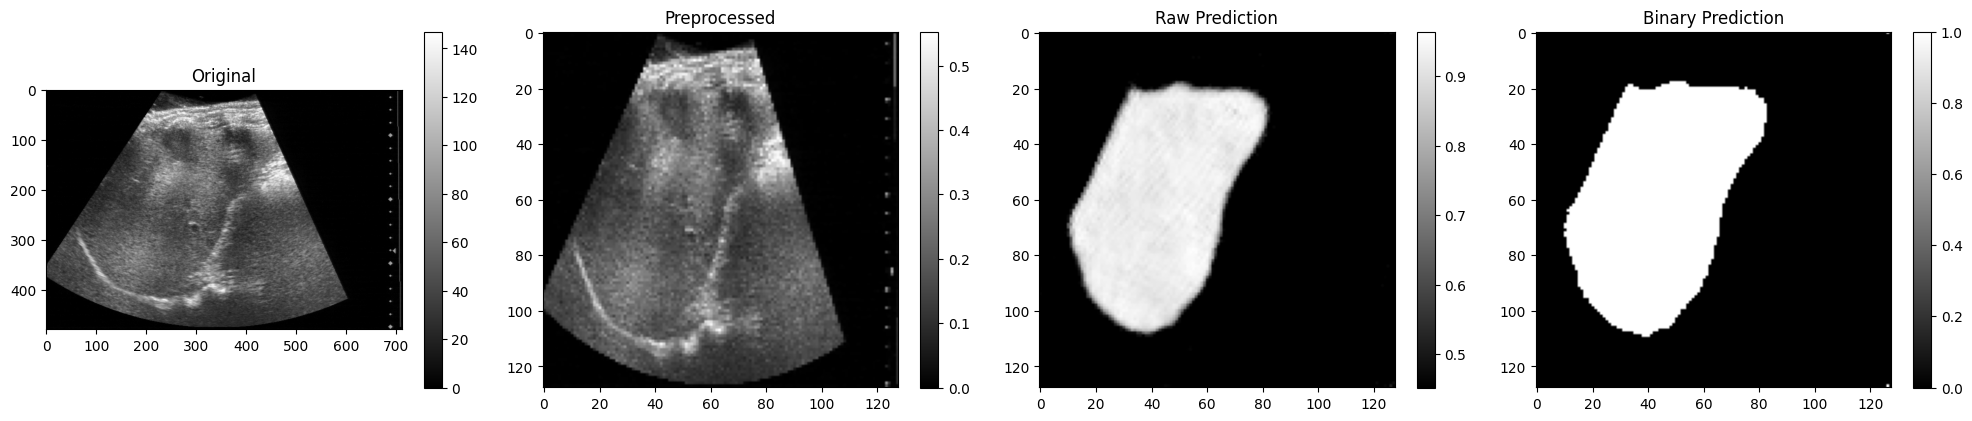

In [29]:
def debug_prediction(image_path, mask_path, model):
    # 1. Load and check image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print(f"Original image shape: {image.shape}")
    print(f"Original image range: [{image.min()}, {image.max()}]")

    # 2. Preprocess and check
    input_image = cv2.resize(image, (128, 128))
    input_image = input_image.astype('float32') / 255.0
    input_image = np.expand_dims(input_image, axis=[0, -1])
    print(f"Input shape to model: {input_image.shape}")
    print(f"Input range to model: [{input_image.min():.3f}, {input_image.max():.3f}]")

    # 3. Get raw predictions
    raw_pred = model.predict(input_image)
    print(f"Raw prediction shape: {raw_pred.shape}")
    print(f"Raw prediction range: [{raw_pred.min():.3f}, {raw_pred.max():.3f}]")
    print(f"Raw prediction unique values: {np.unique(raw_pred).shape[0]} values")

    # 4. Visualize with detailed information
    plt.figure(figsize=(20, 4))

    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.colorbar()

    plt.subplot(142)
    plt.imshow(input_image[0,:,:,0], cmap='gray')
    plt.title('Preprocessed')
    plt.colorbar()

    plt.subplot(143)
    plt.imshow(raw_pred[0,:,:,0], cmap='gray')
    plt.title('Raw Prediction')
    plt.colorbar()

    plt.subplot(144)
    binary_pred = (raw_pred[0,:,:,0] > 0.5).astype(np.uint8)
    plt.imshow(binary_pred, cmap='gray')
    plt.title('Binary Prediction')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    return raw_pred

# Test with a sample image
sample_pred = debug_prediction(sample_image_path, sample_mask_path, model)

1. Original image stats:
   Shape: (480, 712)
   Range: [0, 147]

2. Input tensor stats:
   Shape: (1, 128, 128, 1)
   Range: [0.000, 0.553]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

3. Raw prediction stats:
   Shape: (1, 128, 128, 1)
   Range: [0.452, 0.964]
   Mean: 0.571

4. Model architecture:


Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │             18 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 93,445 (365.02 KB)

 Trainable params: 31,025 (121.19 KB)

 Non-trainable params: 368 (1.44 KB)

 Optimizer params: 62,052 (242.39 KB)

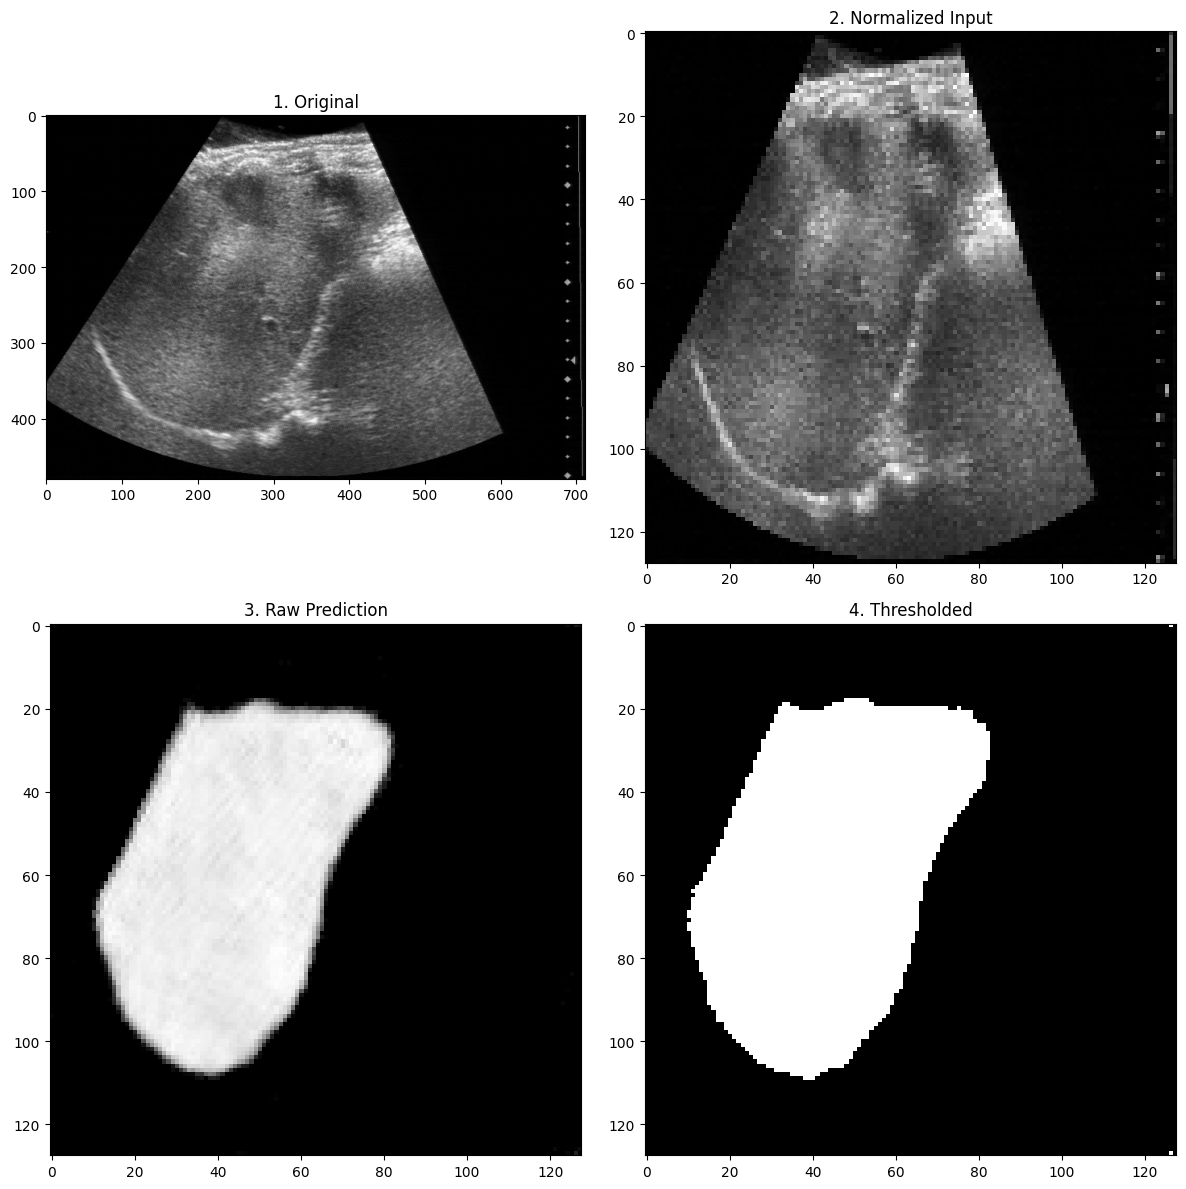

In [30]:
def detailed_debug(image_path, mask_path, model):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to load image from {image_path}")
    print(f"1. Original image stats:")
    print(f"   Shape: {image.shape}")
    print(f"   Range: [{image.min()}, {image.max()}]")

    # Preprocess
    resized = cv2.resize(image, (128, 128))
    normalized = resized.astype('float32') / 255.0
    input_tensor = np.expand_dims(normalized, axis=[0, -1])
    print(f"\n2. Input tensor stats:")
    print(f"   Shape: {input_tensor.shape}")
    print(f"   Range: [{input_tensor.min():.3f}, {input_tensor.max():.3f}]")

    # Model prediction
    pred = model.predict(input_tensor)
    print(f"\n3. Raw prediction stats:")
    print(f"   Shape: {pred.shape}")
    print(f"   Range: [{pred.min():.3f}, {pred.max():.3f}]")
    print(f"   Mean: {pred.mean():.3f}")

    # Model summary
    print("\n4. Model architecture:")
    model.summary()

    # Visualize
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0,0].imshow(image, cmap='gray')
    axes[0,0].set_title('1. Original')

    axes[0,1].imshow(normalized, cmap='gray')
    axes[0,1].set_title('2. Normalized Input')

    axes[1,0].imshow(pred[0,:,:,0], cmap='gray')
    axes[1,0].set_title('3. Raw Prediction')

    binary = (pred[0,:,:,0] > 0.5).astype(np.uint8)
    axes[1,1].imshow(binary, cmap='gray')
    axes[1,1].set_title('4. Thresholded')

    plt.tight_layout()
    plt.show()

    return pred, binary

# Run debug
test_pred, test_binary = detailed_debug(sample_image_path, sample_mask_path, model)

Original image range: [0, 142]
Preprocessed image range: [0.0, 0.5568627715110779]
Ground truth mask range: [0.0, 1.0]
Input batch shape: (1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Raw prediction range: [0.45206400752067566, 0.9594816565513611]
Binary prediction unique values: [0 1]


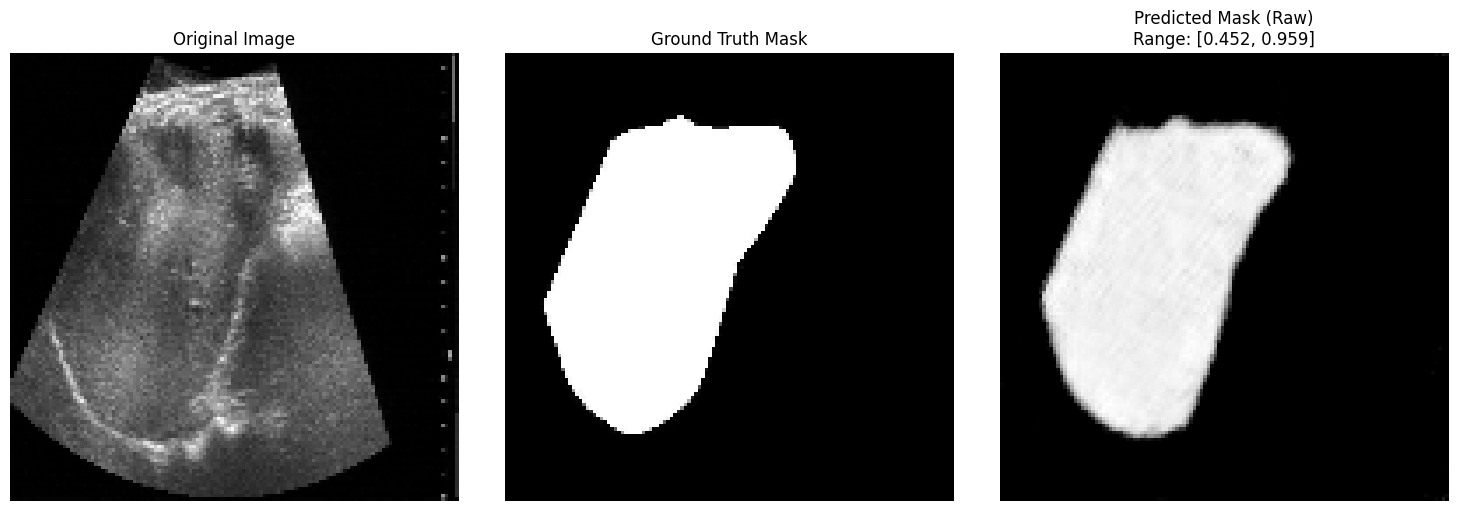

Accuracy: 0.9788
F1 Score: 0.9590


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise ValueError(f"Could not load image from {image_path}")
    original_image = cv2.resize(original_image, target_size)

    # Debug print
    print(f"Original image range: [{original_image.min()}, {original_image.max()}]")

    preprocessed_image = original_image.astype('float32') / 255.0
    print(f"Preprocessed image range: [{preprocessed_image.min()}, {preprocessed_image.max()}]")

    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)
    return original_image, preprocessed_image

def load_ground_truth_mask(mask_path, target_size=(128, 128)):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Could not load mask from {mask_path}")
    mask = cv2.resize(mask, target_size)
    mask = mask.astype('float32') / 255.0
    print(f"Ground truth mask range: [{mask.min()}, {mask.max()}]")
    return mask

# Load and predict
image_path = "/content/dataset/test/Images/scene00024.jpeg"
mask_path = "/content/dataset/test/masks/scene00024.jpeg"

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)
print(f"Input batch shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)
print(f"Raw prediction range: [{predicted_mask.min()}, {predicted_mask.max()}]")

# Try different threshold values if needed
threshold = 0.5
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)
print(f"Binary prediction unique values: {np.unique(predicted_mask_binary)}")

# Visualization with enhanced contrast
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
plt.title(f'Predicted Mask (Raw)\nRange: [{predicted_mask.min():.3f}, {predicted_mask.max():.3f}]')
plt.axis('off')

plt.tight_layout()
plt.show()

# Metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = (ground_truth_mask > 0.5).astype(np.uint8).flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Metrics

Processing image 1/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


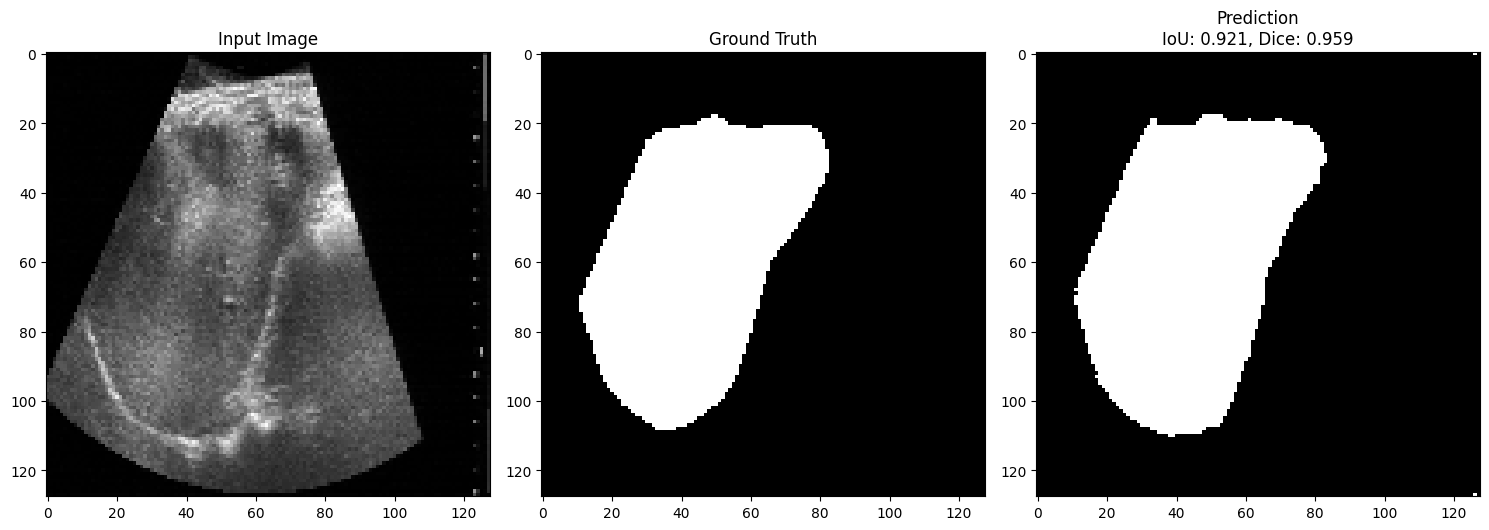

Processing image 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing image 6/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


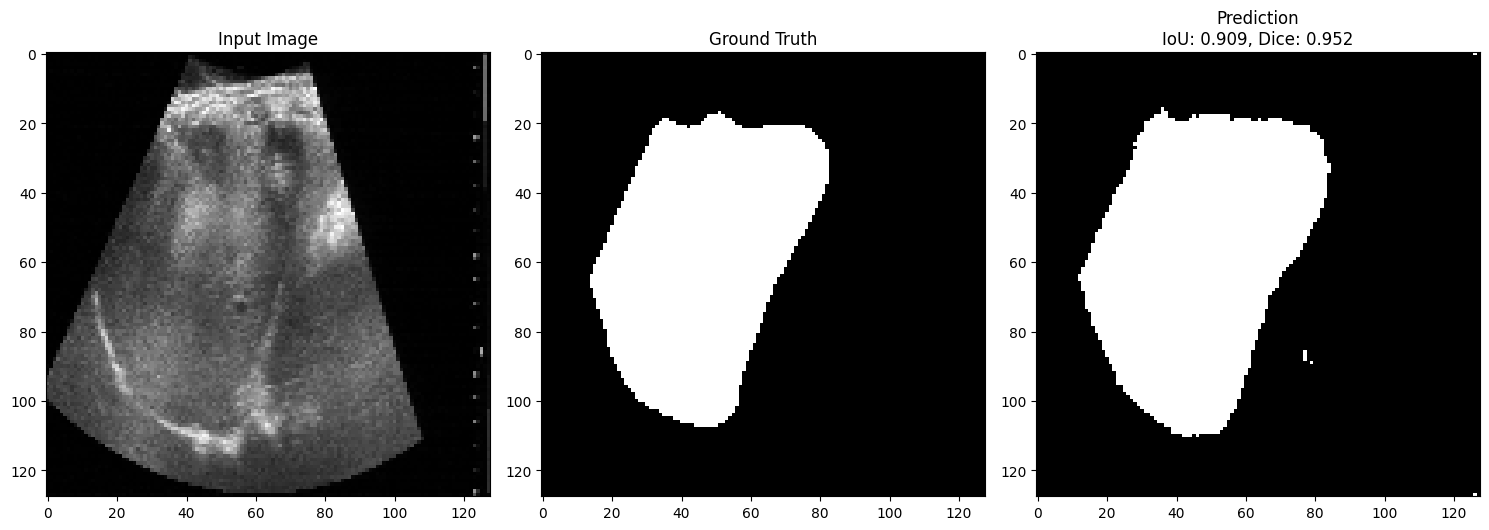

Processing image 7/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing image 8/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 9/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processing image 10/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing image 11/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


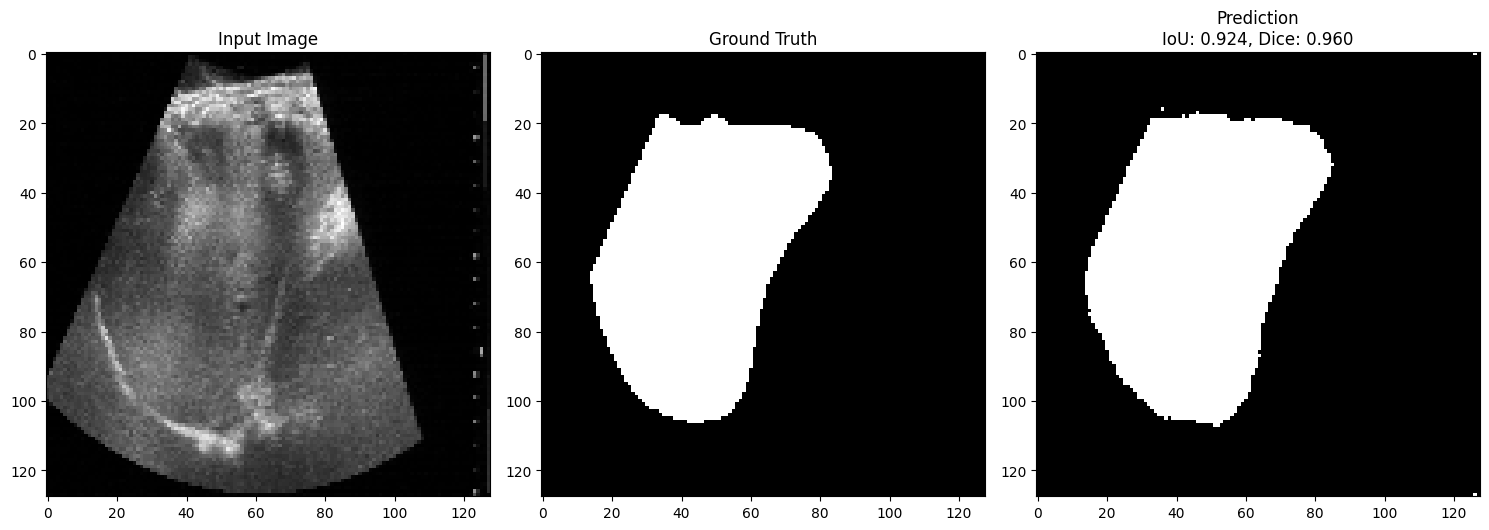

Processing image 12/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test Results:
Mean IoU: 0.9344 ± 0.0140
Mean Dice: 0.9660 ± 0.0075


In [33]:
import os
import numpy as np
import cv2
from sklearn.metrics import jaccard_score, f1_score
import matplotlib.pyplot as plt

class TestDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(128,128)):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        # Load and preprocess image
        img_path = self.image_paths[index]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1)

        # Load and preprocess mask
        mask_path = self.mask_paths[index]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        return np.expand_dims(img, axis=0), np.expand_dims(mask, axis=0)

def compute_metrics_with_visualization(model, data_gen, save_path=None):
    iou_scores = []
    dice_scores = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)
        pred_binary = (pred > 0.5).astype(np.uint8)
        mask_binary = (mask > 0.5).astype(np.uint8)

        # Calculate metrics
        iou = jaccard_score(mask_binary.flatten(), pred_binary.flatten())
        dice = f1_score(mask_binary.flatten(), pred_binary.flatten())

        iou_scores.append(iou)
        dice_scores.append(dice)

        # Visualize every 5th image
        if i % 5 == 0:
            plt.figure(figsize=(15, 5))
            plt.subplot(131)
            plt.imshow(image[0,:,:,0], cmap='gray')
            plt.title('Input Image')
            plt.subplot(132)
            plt.imshow(mask[0,:,:,0], cmap='gray')
            plt.title('Ground Truth')
            plt.subplot(133)
            plt.imshow(pred_binary[0,:,:,0], cmap='gray')
            plt.title(f'Prediction\nIoU: {iou:.3f}, Dice: {dice:.3f}')
            plt.tight_layout()
            plt.show()

    mean_iou = np.mean(iou_scores)
    mean_dice = np.mean(dice_scores)
    std_iou = np.std(iou_scores)
    std_dice = np.std(dice_scores)

    return {
        'mean_iou': mean_iou,
        'mean_dice': mean_dice,
        'std_iou': std_iou,
        'std_dice': std_dice,
        'all_ious': iou_scores,
        'all_dices': dice_scores
    }

# Usage
TEST_IMAGE_PATH = "/content/dataset/test/Images"
TEST_MASK_PATH = "/content/dataset/test/masks"

test_data_gen = TestDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)
metrics = compute_metrics_with_visualization(model, test_data_gen, save_path='test_predictions')

print(f"Test Results:")
print(f"Mean IoU: {metrics['mean_iou']:.4f} ± {metrics['std_iou']:.4f}")
print(f"Mean Dice: {metrics['mean_dice']:.4f} ± {metrics['std_dice']:.4f}")